# Testing packages and file access

In [13]:
import os
import glob
import pandas as pd
import numpy as np
import xarray as xr
import pickle as pkl

import cartopy
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.path as mpath

import cmocean.cm as cmo

import warnings
warnings.filterwarnings("ignore", message="Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range")

In [7]:
new_run = '/tiger/scratch/gpfs/GEOCLIM/bgb2/AM2.5/work/CTL1990s_tigercpu_intelmpi_18_540PE/POSTP/'
old_run = '/projects/GEOCLIM/wenchang/MODEL_OUT/AM2.5/CTL1990s_tigercpu_intelmpi_18_540PE/POSTP/'

In [8]:
nt_surf = xr.open_mfdataset(new_run+'*.atmos_month.nc')['t_surf'].sel(time=slice('010101','010312'))
ot_surf = xr.open_mfdataset(old_run+'*.atmos_month.nc')['t_surf'].sel(time=slice('010101','010312'))

In [11]:
lt = 88.75
ln = 1.5625
print(nt_surf.sel(grid_yt=lt, grid_xt=ln).values)
print(ot_surf.sel(grid_yt=lt, grid_xt=ln).values)

[242.90926 241.409   241.52745 252.93178 269.17776 273.16    273.16
 272.94376 263.92694 251.57538 244.585   240.43053 243.48985 246.03769
 244.95932 254.31305 270.40143 273.15985 273.16    272.57535 261.5337
 252.1562  248.98528 245.68124 237.71085 243.0729  250.28416 256.7794
 270.35876 273.16    273.16    272.9106  262.72116 252.01936 249.31715
 250.20816]
[242.90926 241.409   241.52745 252.93178 269.17776 273.16    273.16
 272.94376 263.92694 251.57538 244.585   240.43053 243.48985 246.03769
 244.95932 254.31305 270.40143 273.15985 273.16    272.57535 261.5337
 252.1562  248.98528 245.68124 237.71085 243.0729  250.28416 256.7794
 270.35876 273.16    273.16    272.9106  262.72116 252.01936 249.31715
 250.20816]


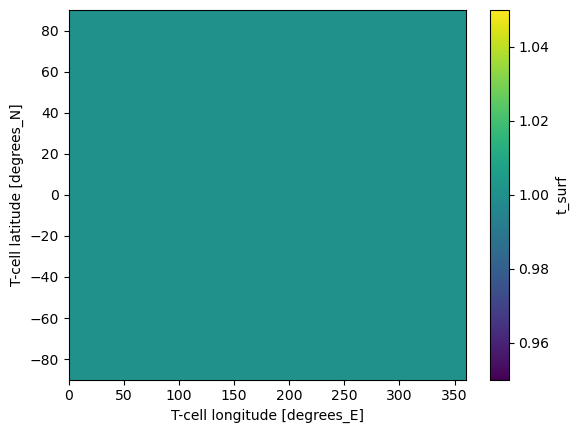

In [12]:
(nt_surf.mean(dim='time') == ot_surf.mean(dim='time')).plot()